In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv ("cluster.csv" , header = None )

In [12]:
data

,0,1
0,2.7759,-1.47160
1,6.1090,0.99685
2,3.2623,-1.30980
3,2.2895,-0.43370
4,2.2404,-4.09190
...,...,...
495,6.2217,0.85987
496,1.7653,-3.60520
497,2.2766,-3.26570
498,1.8497,-4.36950


In [13]:
x = data.values

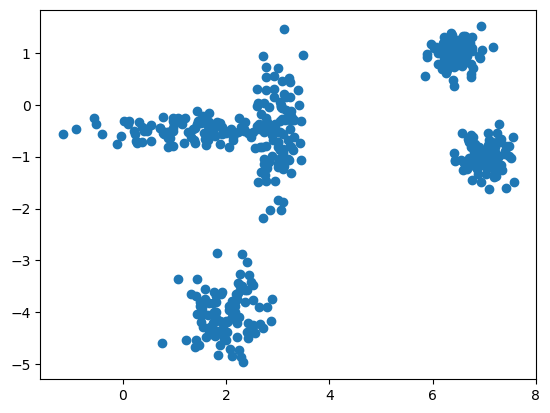

In [14]:
plt.scatter (x [: , 0] , x [: , 1] )

In [15]:
kms = KMeans (n_init = 5 , init = "k-means++" , n_clusters = 3 )
kms.fit (x)

KMeans(n_clusters=3, n_init=5)

In [16]:
kms_centres = kms.cluster_centers_
kms_labels = kms.labels_

In [17]:
data["Labels"] = kms_labels

In [18]:
data

,0,1,Labels
0,2.7759,-1.47160,0
1,6.1090,0.99685,1
2,3.2623,-1.30980,0
3,2.2895,-0.43370,0
4,2.2404,-4.09190,2
...,...,...,...
495,6.2217,0.85987,1
496,1.7653,-3.60520,2
497,2.2766,-3.26570,2
498,1.8497,-4.36950,2


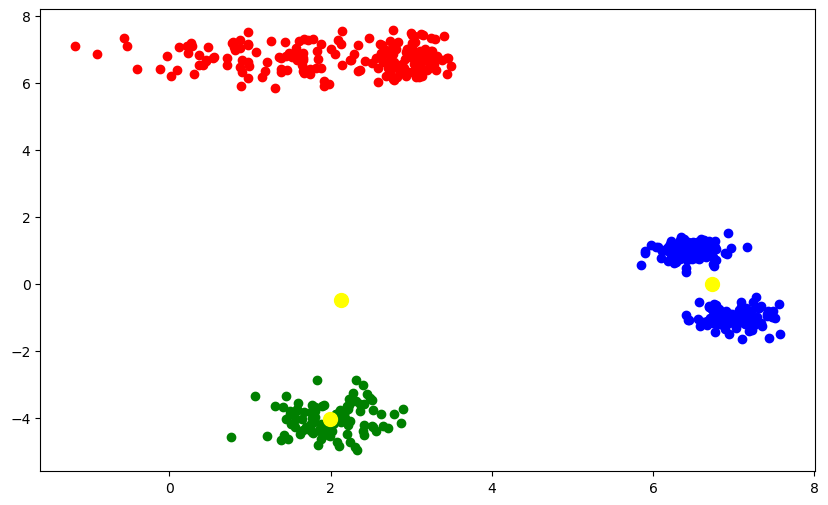

In [19]:
plt.figure (figsize = (10, 6))
plt.scatter (x = data [data ["Labels"] == 0 ] [0] , y = data [data ["Labels"] == 1 ] [0] , c = "Red"  )
plt.scatter (x = data [data["Labels"] == 1 ] [0]  , y = data [data ["Labels"] == 1 ] [1]  , c = "Blue"  )
plt.scatter (x = data [data ["Labels"] == 2 ] [0]  , y = data [data ["Labels"] == 2 ] [1]  , c = "Green"  )
plt.scatter (kms_centres [: , 0  ]  , kms_centres [: , 1] , c = "Yellow" , s = 100  )

In [20]:
kms.inertia_

556.3177114895315

In [21]:
y = []
for k in np.arange (1 , 10) :
    kms = KMeans (n_clusters = k)
    kms.fit (x)
    y.append (kms.inertia_)
y

[4312.654120127431,
 1389.3101384676206,
 556.3177114895315,
 338.3573342967435,
 162.72514428246382,
 132.2518477844727,
 121.1663891762507,
 90.15217921069572,
 92.21850377132871]

Text(0, 0.5, 'Inertia')

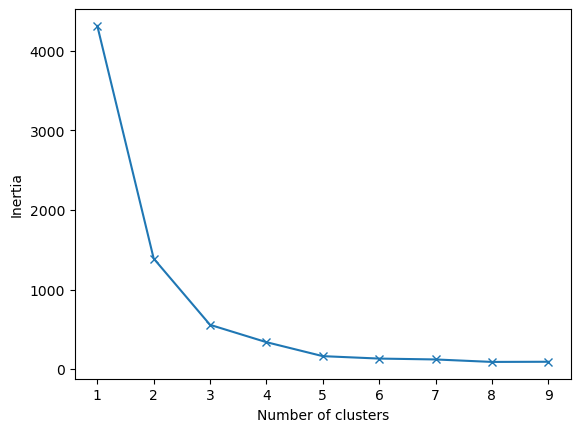

In [22]:
plt.plot (np.arange (1,10) , y , marker = "x" )
plt.xlabel ("Number of clusters")
plt.ylabel ("Inertia")

Based on the KMeans inertia applied to this dataset, we must know that from the point the elbow starts to decrease steadily (which in this case
3), we can conclude that this is the best cluster we can chose as our number of clusters. So my fictional colleague is right with his statement. But in general, we must always try to use this method in order to find the best cluster because randomly choosing a number for our cluster is not ideal and we might have a better option using this method.